In [45]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (3, 3)

In [36]:
config = {
    "inputData": "/path/to/input/data/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years-adj-cabinets_selected-parties/{}",
    "nTopics": 100
}

usefulness_data = pd.read_excel(config.get('outDir').format('topics_100.xlsx'), index_col=0)
topic_coherence_data = pd.read_csv(config.get('outDir').format('topic_coherence_100.csv'), index_col=0)

data = pd.concat([usefulness_data, topic_coherence_data], axis=1)
#data

In [18]:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve

def plot_roc_curve(data, measure, threshold=3):
    fpr, tpr, thr = roc_curve(data['usefulness'] >= threshold, data[measure])

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Topic coherence using {}'.format(measure))
    plt.legend(loc="lower right")
    plt.show()

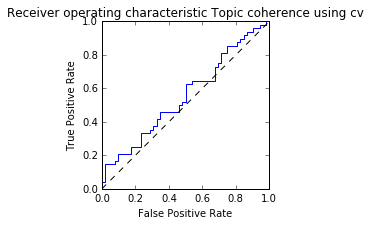

In [46]:
plot_roc_curve(data, 'cv')

ROC curve komt net boven random uit, dat is teleurstellend (maar niet geheel onverwachts).

Volgende stap is vergelijken vocabulaire lemma's uit frog vs. uit pattern.

Wat ook nog kan: andere measures proberen (alle opties uit palmetto, dat zijn er 6 ofzo)

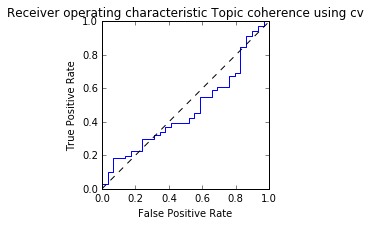

In [47]:
plot_roc_curve(data, 'cv', threshold=2)

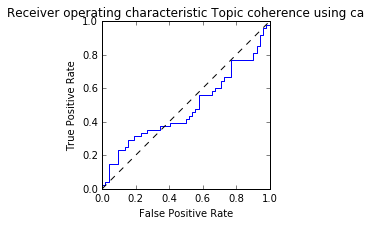

In [48]:
plot_roc_curve(data, 'ca')

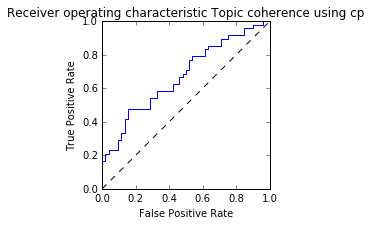

In [49]:
plot_roc_curve(data, 'cp')

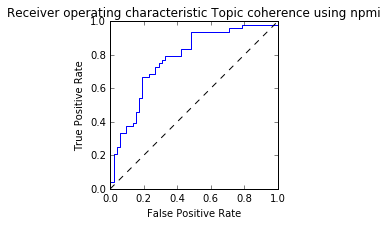

In [50]:
plot_roc_curve(data, 'npmi')

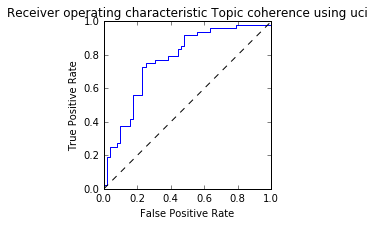

In [51]:
plot_roc_curve(data, 'uci')

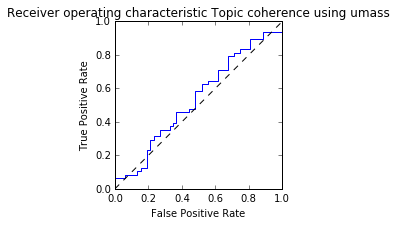

In [52]:
plot_roc_curve(data, 'umass')